In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('hearing_test.csv')
df.head(5)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [21]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [22]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

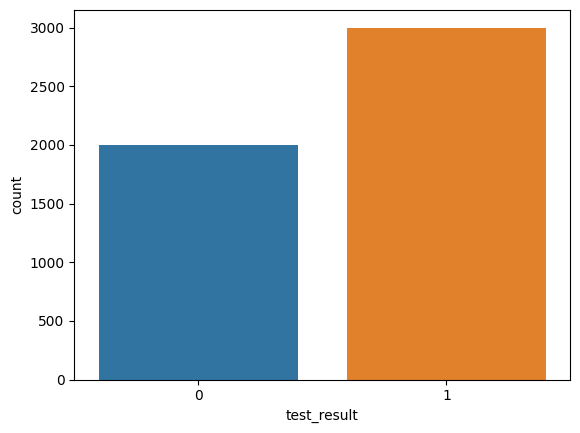

In [23]:
sns.countplot(data=df,x='test_result');

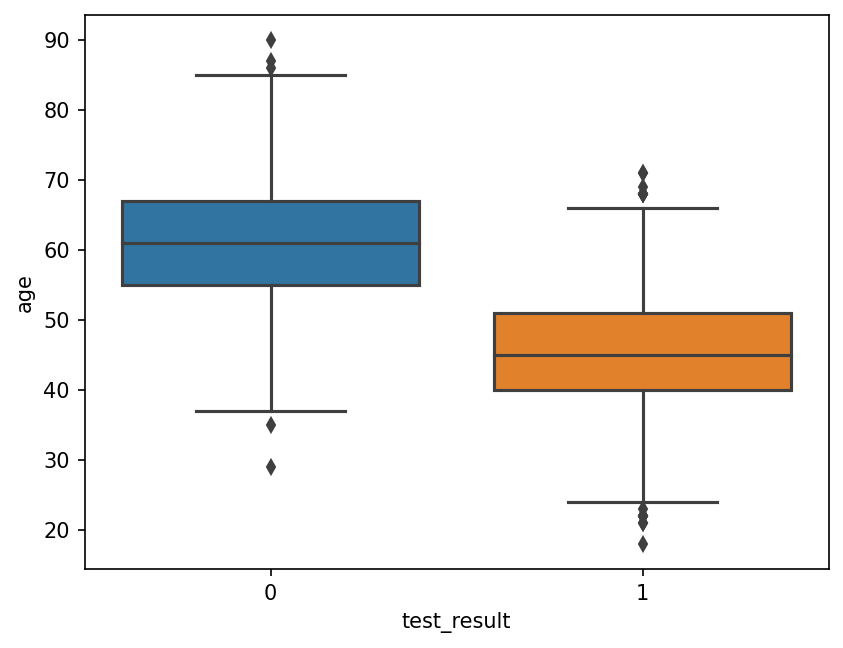

In [24]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df);

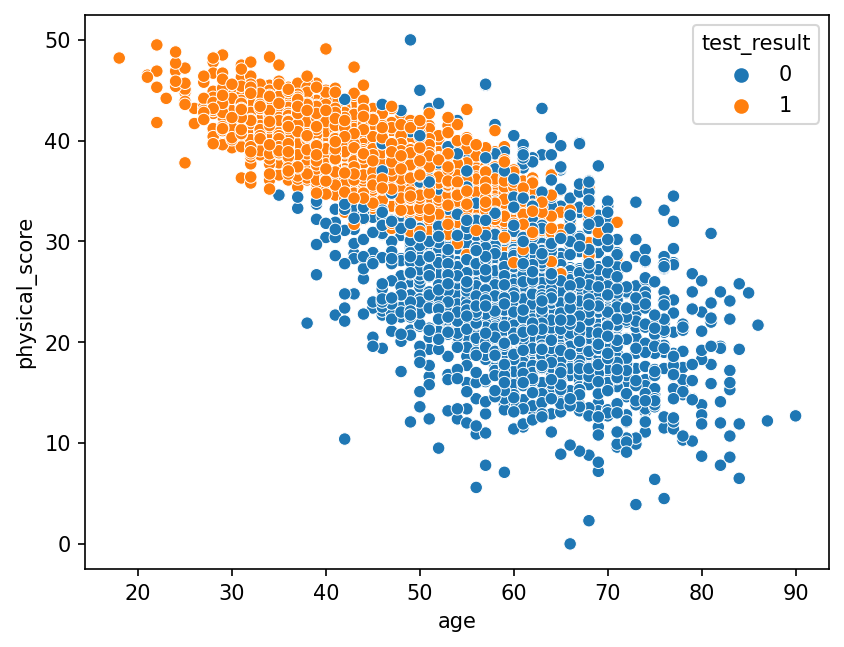

In [25]:
plt.figure(dpi=150)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result');

<Axes: >

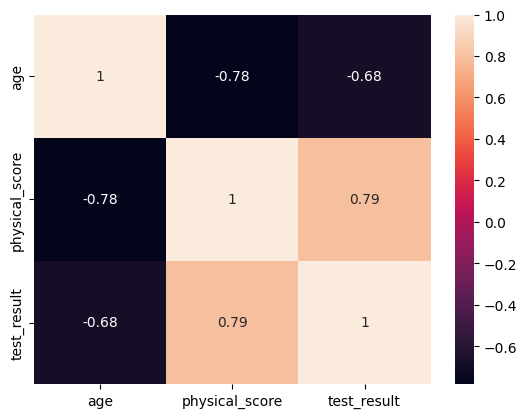

In [26]:
sns.heatmap(df.corr(),annot=True)

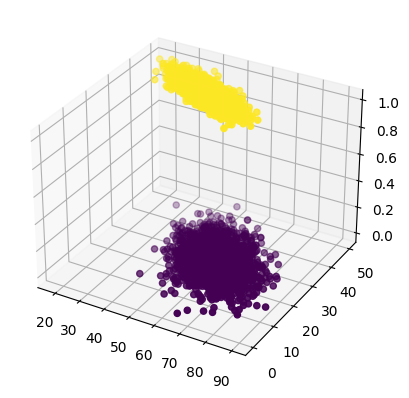

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'],df['test_result'], c=df['test_result'])

In [28]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [31]:
scaler=StandardScaler()

In [32]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model=LogisticRegression()

In [35]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [54]:
print(log_model.coef_)

[[-0.94953524  3.45991194]]


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
y_pred=log_model.predict(scaled_X_test)

In [53]:
acc_sc=accuracy_score(y_test,y_pred)
print(acc_sc)

0.93


In [40]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

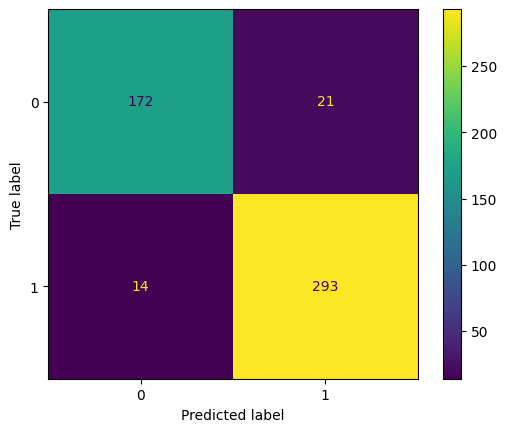

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [44]:
from sklearn.metrics import precision_score,recall_score

In [45]:
precision_score(y_test,y_pred),recall_score(y_test,y_pred)

(0.9331210191082803, 0.9543973941368078)

In [46]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

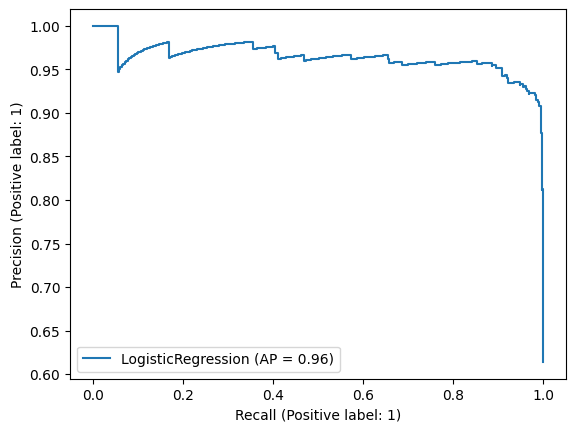

In [47]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

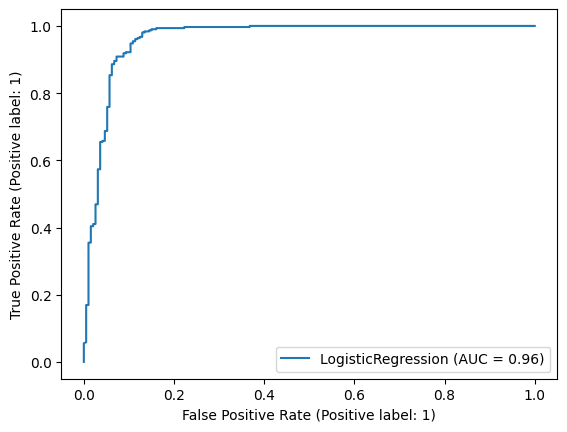

In [48]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)